In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [151]:
train = pd.read_csv('loan_train.csv')

In [152]:
test = pd.read_csv('loan_test.csv')

In [153]:
train_original = train.copy()
test_original = test.copy()

In [154]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [156]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [157]:
test.shape , train.shape

((367, 12), (614, 13))

In [158]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [159]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

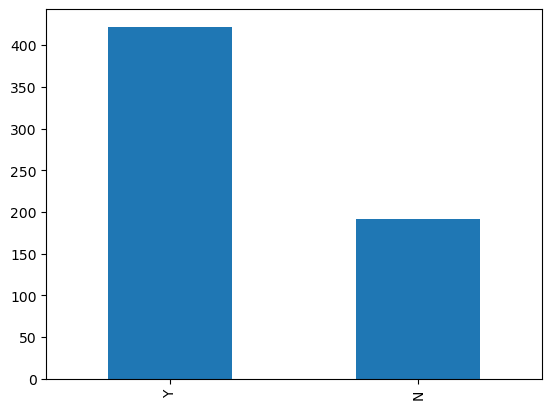

In [160]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

In [161]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Independant variables (Categorical)

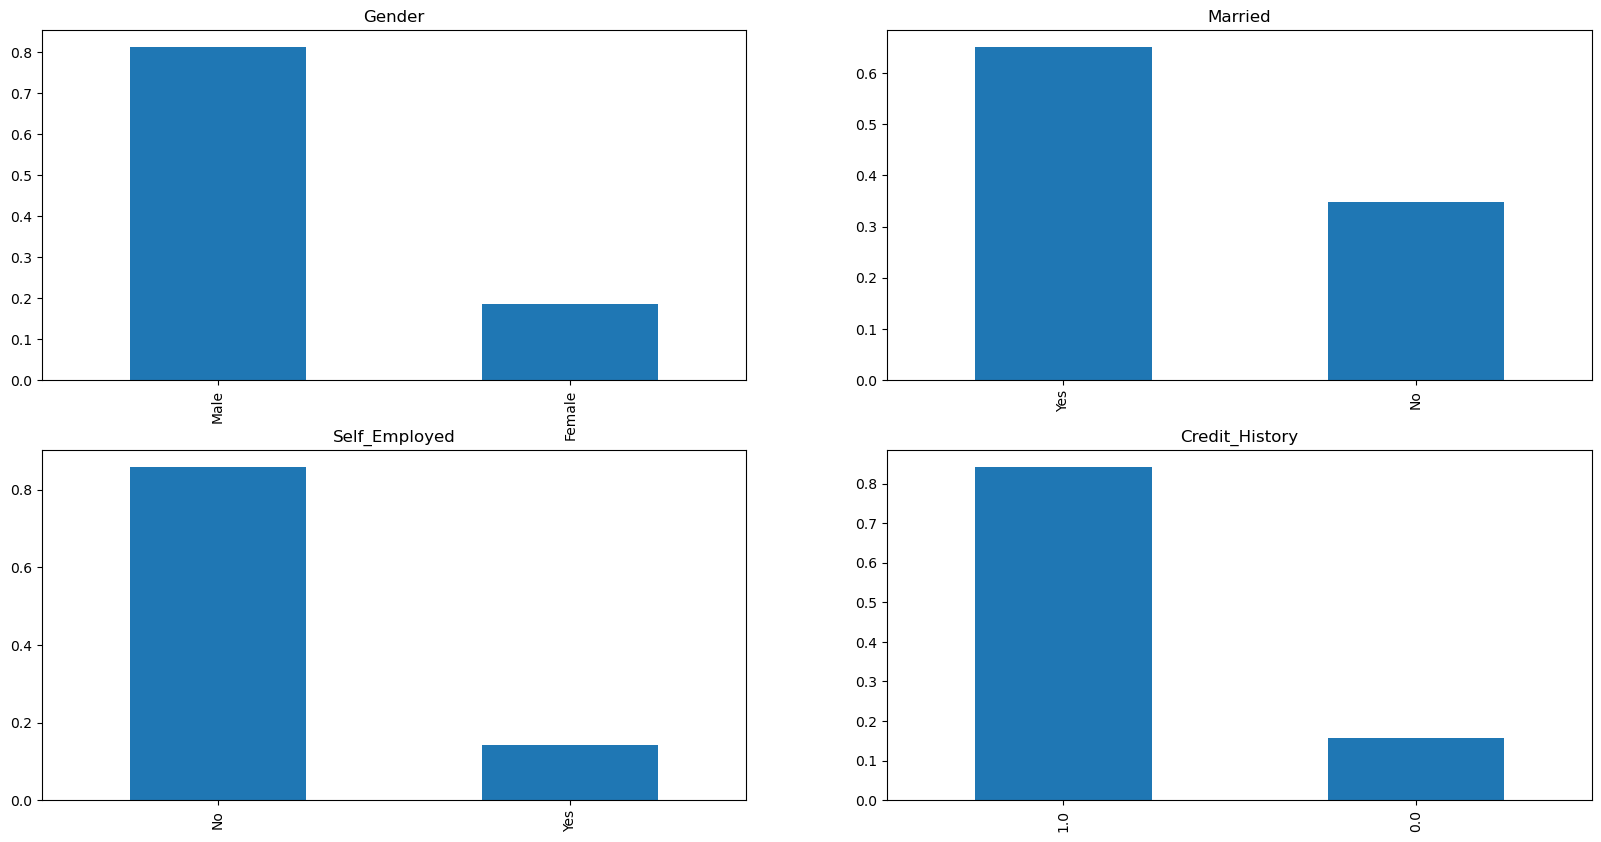

In [162]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Credit_History')
plt.show()

# Independant  variable (Ordinal)

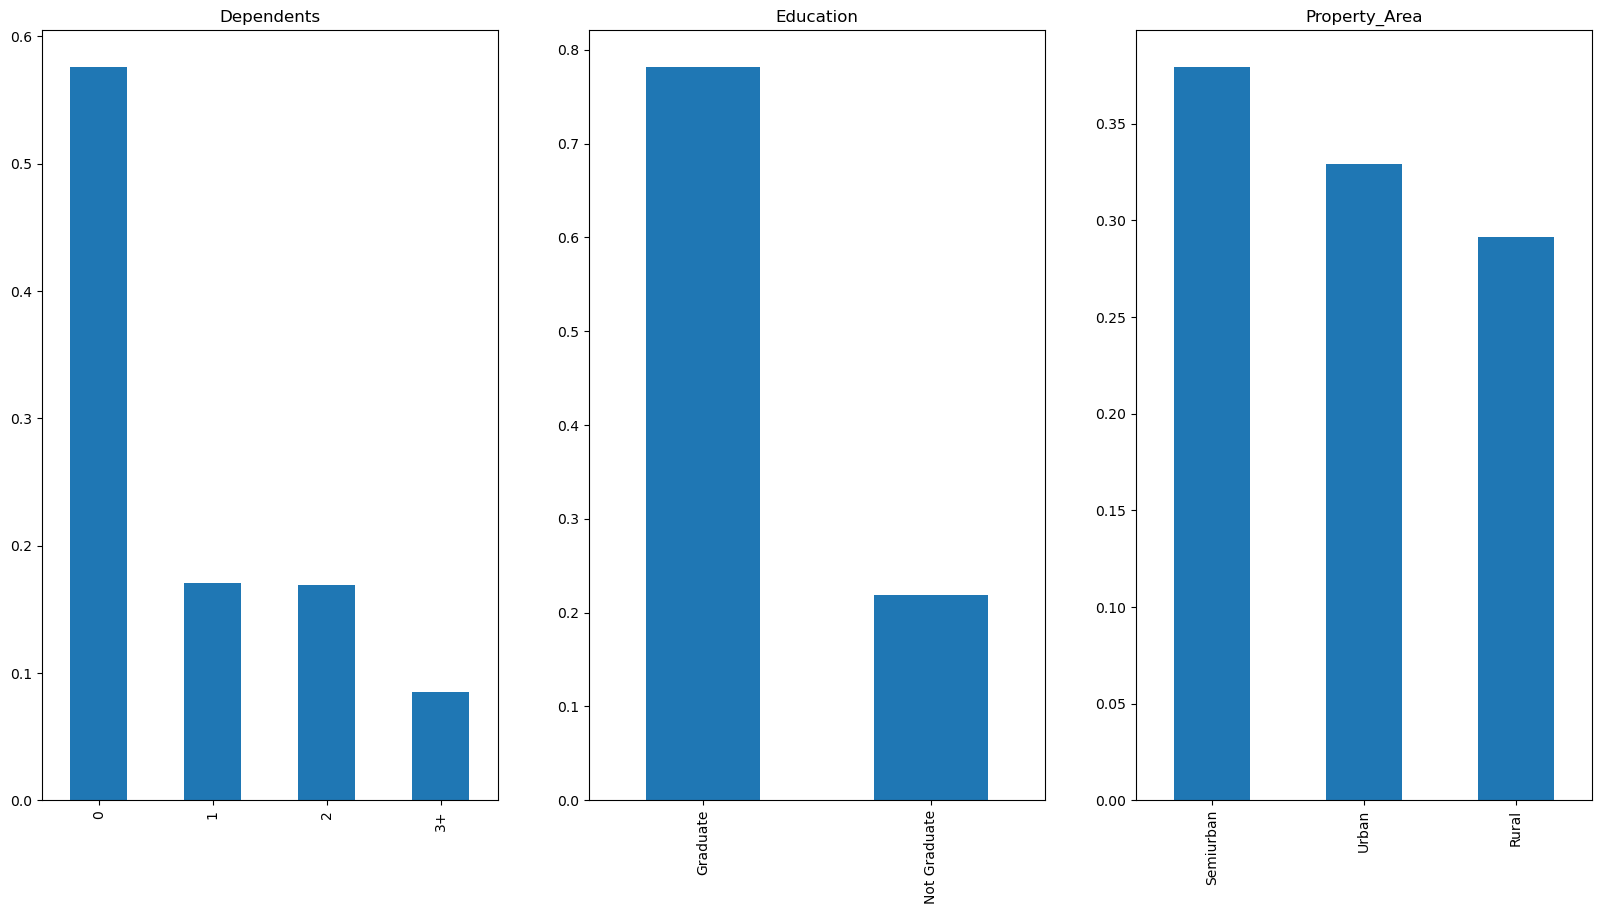

In [163]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Property_Area')
plt.show()

# Independent Variable (Numerial)

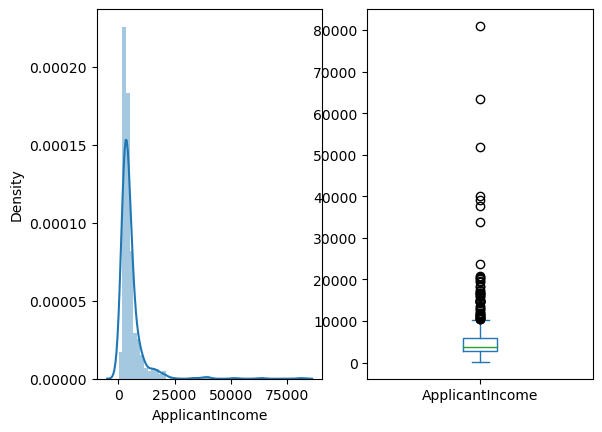

In [164]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.show()

Text(0.5, 0.98, '')

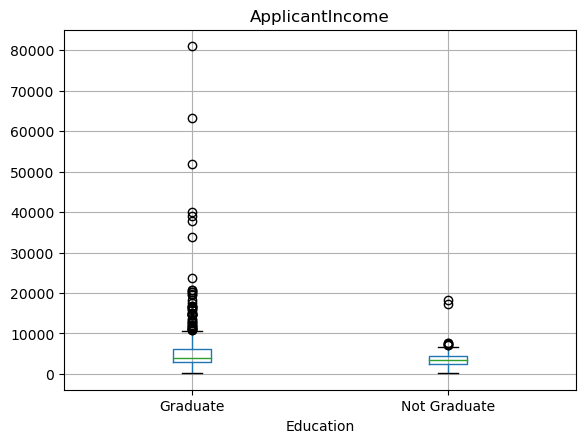

In [165]:
train.boxplot(column ='ApplicantIncome' , by='Education')
plt.suptitle("")

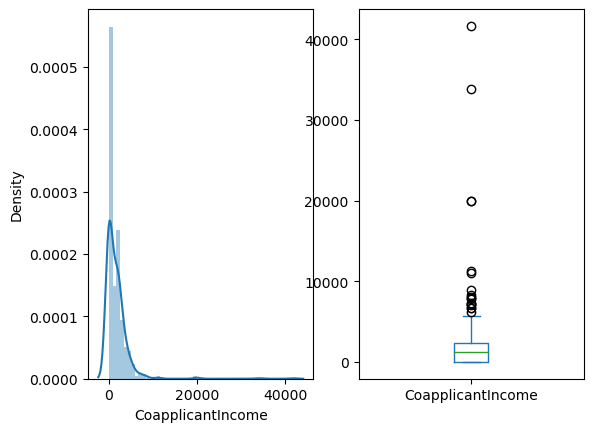

In [166]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box()
plt.show()

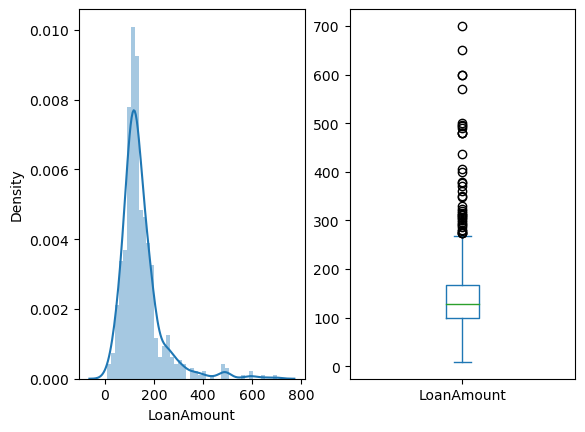

In [167]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box()
plt.show()

# Gender vs Loan Status

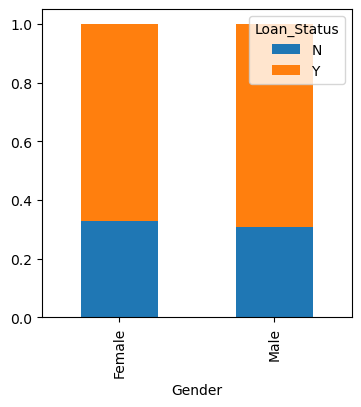

In [168]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Property_Area'>

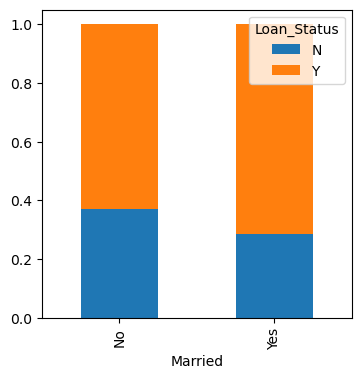

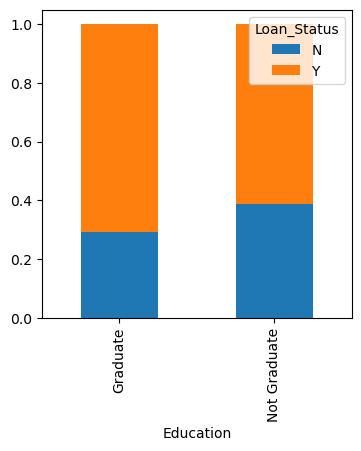

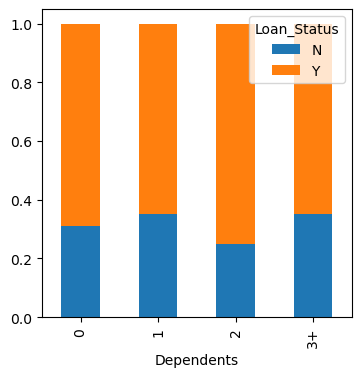

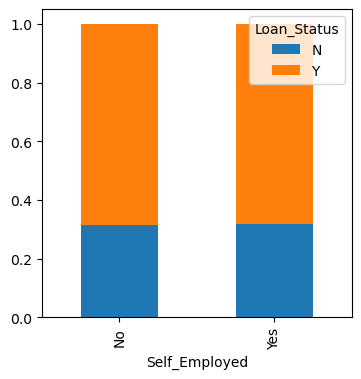

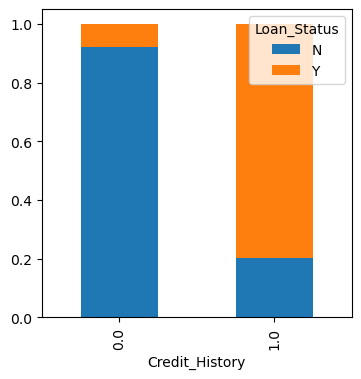

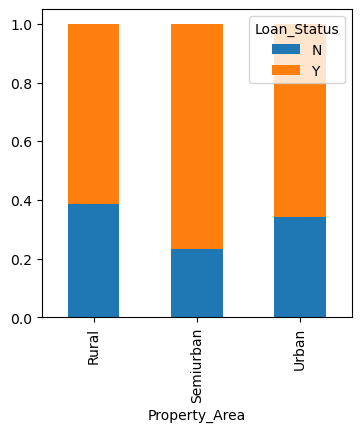

In [169]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

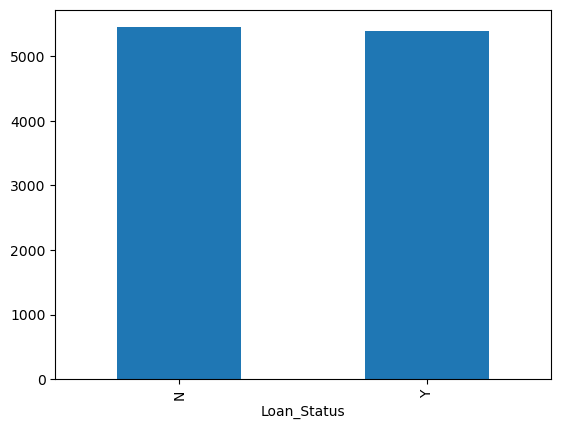

In [170]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [171]:
bins=[0,2500,4000,6000,81000] 
group=['low','average','high','very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Text(0, 0.5, 'percentage')

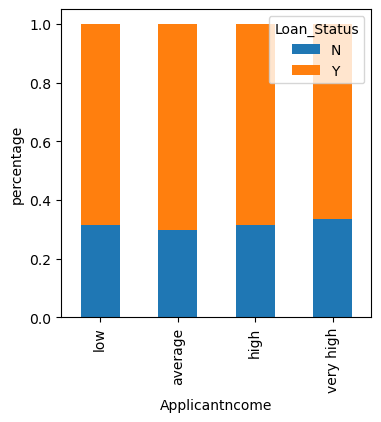

In [172]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicantncome')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

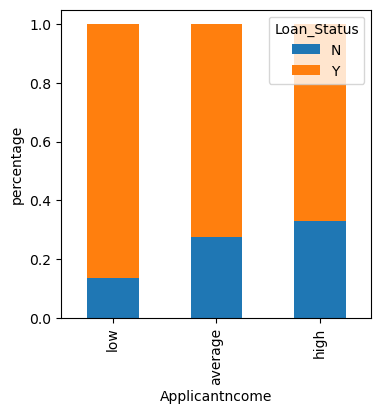

In [173]:
bins=[0,1000,3000,42000] 
group=['low','average','high']
train['Coincome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coincome_bin=pd.crosstab(train['Coincome_bin'],train['Loan_Status'])
Coincome_bin.div(Coincome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicantncome')
plt.ylabel('percentage')

Text(0, 0.5, ' Percentage ')

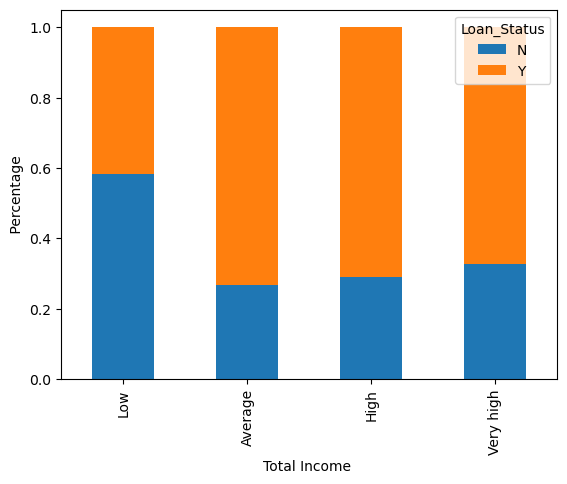

In [174]:
train['Total_Income' ]=train[ 'ApplicantIncome' ]+train ['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000] 
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut (train['Total_Income' ], bins, labels=group)
Total_Income_bin=pd.crosstab (train['Total_Income_bin'],train[ 'Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype (float),axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total Income ')
plt.ylabel ( " Percentage ")


Text(0, 0.5, ' Percentage ')

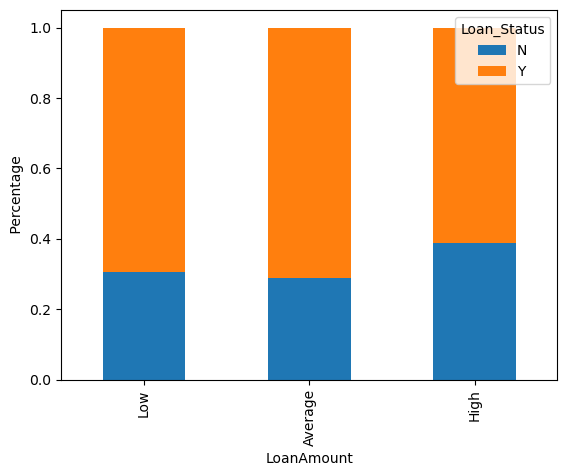

In [175]:
bins=[0, 100, 200, 700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins, labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float) ,axis=0).plot(kind="bar", stacked=True) 
plt.xlabel ( 'LoanAmount')
plt.ylabel ( ' Percentage ')


In [176]:
train=train.drop(['Income_bin','Coincome_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

train['Dependents'].replace('3+', 3, inplace=True)

test['Dependents'].replace( '3+', 3,inplace=True)

train['Loan_Status'].replace ('N', 0, inplace=True)

train['Loan_Status'].replace ( 'Y', 1,inplace=True)


<AxesSubplot:>

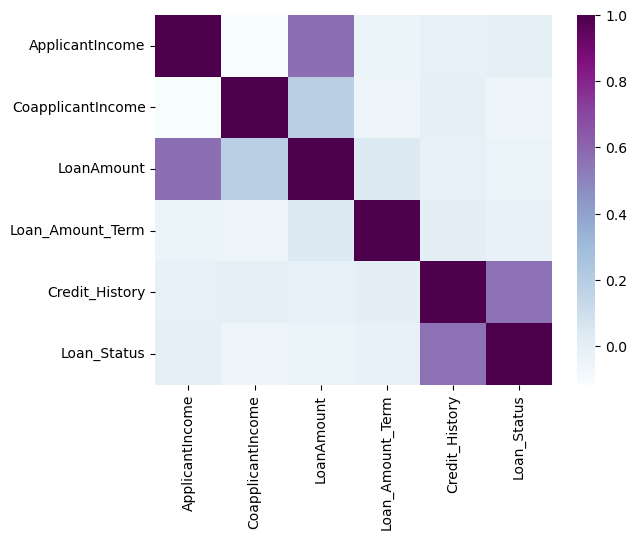

In [177]:
matrix=train.corr()
sns.heatmap(matrix,cmap='BuPu')

In [178]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train ['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [180]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [181]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [182]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [183]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [184]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [185]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)  
test['Credit_History'].fillna(train[ 'Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [186]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

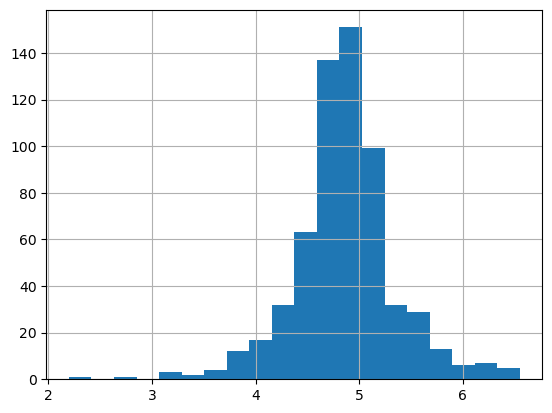

In [187]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)

In [188]:
test['LoanAmount_Log'] = np.log(test['LoanAmount'])

In [189]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_Log'],
      dtype='object')

In [190]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_Log'],
      dtype='object')

In [191]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [192]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [193]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [194]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [195]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [196]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit (x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [200]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7297297297297297

In [201]:
pred_test=model.predict(test)

In [202]:
submission=pd.read_csv('loan_sample_submission.csv')

In [203]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [204]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [209]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Ananthakrishnan_loan_prediction.csv',index=False)